# Get to know  all_data

In this notebook I want to discover the data in order to build a CNN. It should be able to predict the age of wood based on the wooden samples' absorbance of Near-Infrared light. 

# Load the necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# Import the data

In [2]:
csv_directory = '/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/'

# Look at all files in the directory an then chose dps1200.csv which contain the dataframes of our interest
all_csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]
print(all_csv_files)
csv_files = ['dpsDeriv1200.csv','dps1200.csv']

['dpsUNsub1.csv', 'dpsDeriv1200AUT.csv', 'dpsDerivSK.csv', 'dpsDeriv1200.csv', 'dpsSK.csv', 'dpsWOCHPls1.csv', 'dps1200POL.csv', 'dpsDeriv1200Pls1.csv', 'dpsDerivPls1.csv', 'dps1200AUT.csv', 'dps.csv', 'dpsDeriv1200POL.csv', 'dpsDerivUNsub1.csv', 'dpsUN.csv', 'dpsDerivLUO.csv', 'dps1200Pls1.csv', 'dpsExcl.csv', 'dps1200_all.csv', 'dpsDeriv.csv', 'dpsUNsub3.csv', 'dpsLUO.csv', 'dpsPls1.csv', 'dpsDerivUN.csv', 'dpsDerivWOCHPls1.csv', 'dpsDeriv1200SK.csv', 'dps1200SK.csv', 'dpsDerivWOCH.csv', 'dpsDerivExcl.csv', 'dpsUNsub2.csv', 'dpsDerivUNsub3.csv', 'dps1200.csv', 'dpsDerivUNsub2.csv', 'dpsWOCH.csv']


In [3]:
dps1200 = pd.read_csv(f'{csv_directory}/dps1200_all.csv')

## About the dataframe

There are 2 dataframes.

dps1200 = data from Pinus silvestris. It contains only samples which are dated to the year 1200 and younger. The data are already smoothed. 
dpsDeriv1200 = it is the second derivation of dps1200

The columns contain information about the year (estimated age of the wood), the name of the tree (for sample assignment), the country where the tree was found and the type refers to the preservation condition of the wood. The rest of the columns are the different wavenumbers and their corresponding values are the absorbances. The absorbance indicates the state of molecular decay of the sample.

In [4]:
print(dps1200.iloc[:10, :7])
type(dps1200)

   year     tree Origin    type     X3996     X3994     X3992
0  1955  2GOS-18    POL  living  0.016119  0.015972  0.015830
1  1969  2GOS-18    POL  living  0.016368  0.016543  0.016663
2  1974  2GOS-18    POL  living  0.021364  0.021662  0.021862
3  1976  2GOS-18    POL  living  0.019351  0.019246  0.019181
4  1996  2GOS-18    POL  living  0.018548  0.018604  0.018670
5  2000  2GOS-18    POL  living  0.018715  0.018595  0.018428
6  2005  2GOS-18    POL  living  0.016905  0.016772  0.016875
7  1719   2Grc01    POL  constr  0.010250  0.010245  0.010315
8  1722   2Grc01    POL  constr  0.011425  0.011345  0.011269
9  1727   2Grc01    POL  constr  0.012406  0.012187  0.012142


pandas.core.frame.DataFrame

In [4]:
# Remove the X from the bandwithds
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)
print(dps1200.iloc[:10, :7])

   year     tree Origin    type      3996      3994      3992
0  1955  2GOS-18    POL  living  0.016119  0.015972  0.015830
1  1969  2GOS-18    POL  living  0.016368  0.016543  0.016663
2  1974  2GOS-18    POL  living  0.021364  0.021662  0.021862
3  1976  2GOS-18    POL  living  0.019351  0.019246  0.019181
4  1996  2GOS-18    POL  living  0.018548  0.018604  0.018670
5  2000  2GOS-18    POL  living  0.018715  0.018595  0.018428
6  2005  2GOS-18    POL  living  0.016905  0.016772  0.016875
7  1719   2Grc01    POL  constr  0.010250  0.010245  0.010315
8  1722   2Grc01    POL  constr  0.011425  0.011345  0.011269
9  1727   2Grc01    POL  constr  0.012406  0.012187  0.012142


# Inspect the distribution grouped by the origin of the samples

In [6]:
subset = dps1200[["year", "Origin"]]
print(subset)
grouped = dps1200.groupby('Origin')

      year Origin
0     1955    POL
1     1969    POL
2     1974    POL
3     1976    POL
4     1996    POL
...    ...    ...
1291  1942    AUT
1292  1952    AUT
1293  1962    AUT
1294  1972    AUT
1295  1982    AUT

[1296 rows x 2 columns]


In [7]:
unique_countries = subset.groupby('Origin')
num_countries = len(unique_countries)
colors = plt.cm.tab10.colors[:num_countries]

/home/mel/anaconda3/envs/tensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mel/anaconda3/envs/tensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mel/anaconda3/envs/tensor/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mel/anaconda3/envs/tensor/lib/python3.11/site-pa

<function matplotlib.pyplot.show(close=None, block=None)>

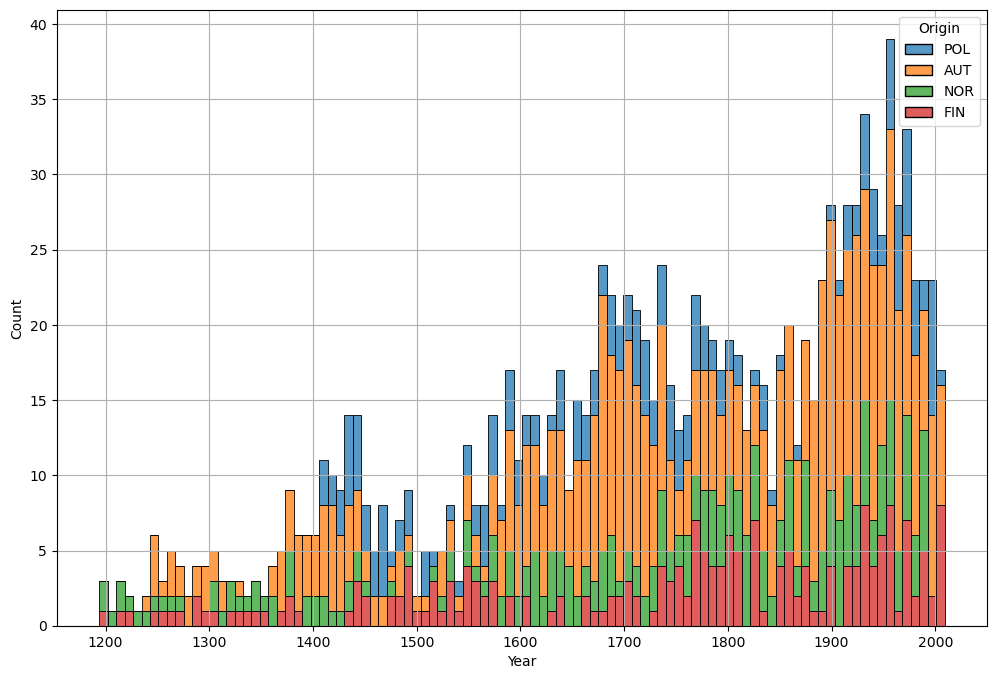

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(data=subset, x='year', bins=100, hue='Origin', multiple="stack", palette=colors, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show

In order to train the CNN model only the year (label) and the bandwidths are needed. 

In [9]:
dps1200 = dps1200.drop(dps1200.columns[1:4], axis=1)
print(dps1200.iloc[:10, :7])

   year      3996      3994      3992      3990      3988      3987
0  1955  0.016119  0.015972  0.015830  0.015728  0.015734  0.015787
1  1969  0.016368  0.016543  0.016663  0.016569  0.016333  0.016217
2  1974  0.021364  0.021662  0.021862  0.021573  0.020925  0.020585
3  1976  0.019351  0.019246  0.019181  0.018998  0.018926  0.019205
4  1996  0.018548  0.018604  0.018670  0.018616  0.018375  0.018266
5  2000  0.018715  0.018595  0.018428  0.018274  0.018128  0.018145
6  2005  0.016905  0.016772  0.016875  0.016983  0.016856  0.016753
7  1719  0.010250  0.010245  0.010315  0.010373  0.010355  0.010403
8  1722  0.011425  0.011345  0.011269  0.011208  0.011180  0.011309
9  1727  0.012406  0.012187  0.012142  0.012138  0.012141  0.012341


In [10]:
print(dps1200.shape)

(1296, 1867)


# Get to know the data

## Dataset dps1200

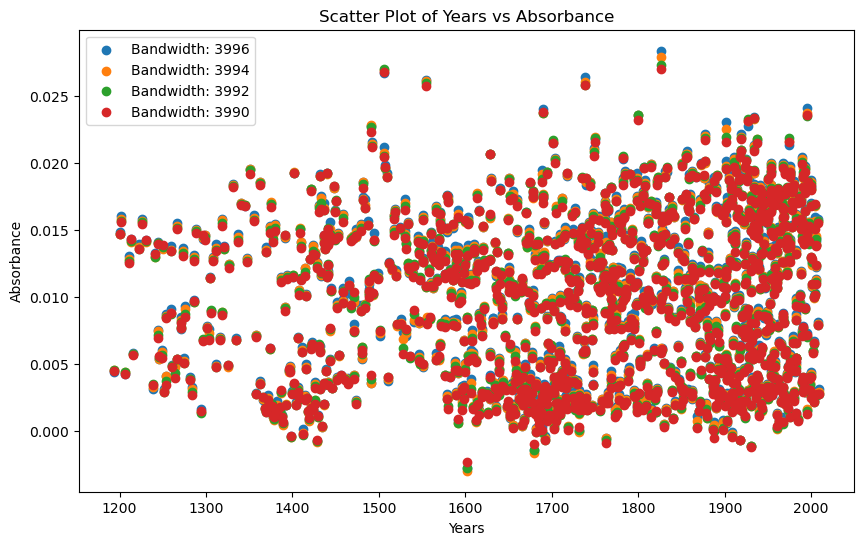

In [10]:
feature_index = 5  
x = dps1200.iloc[:, 0]
y = dps1200.iloc[:, 1]

plt.figure(figsize=(10, 6))  

for feature_index in range(1,5):
    plt.scatter(dps1200.iloc[1:, 0], dps1200.iloc[1:, feature_index], label= f'Bandwidth: {dps1200.columns.values[feature_index]}')

plt.xlabel('Years')
plt.ylabel('Absorbance')
plt.title('Scatter Plot of Years vs Absorbance')
plt.legend()
plt.show()

# Descriptive statistics

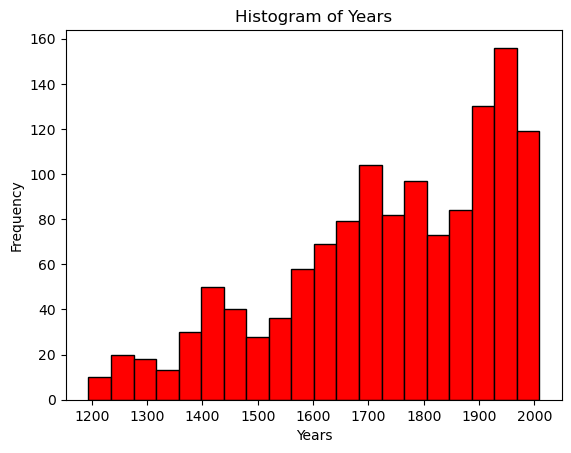

In [11]:
plt.hist(dps1200.iloc[:, 0], bins=20, color='red', edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Histogram of Years')
plt.show()

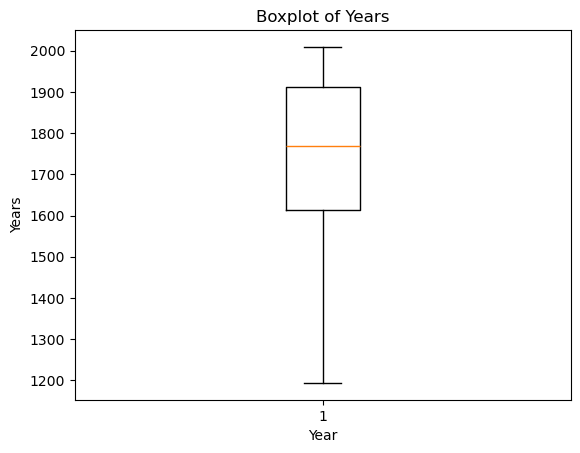

In [12]:
years = dps1200.iloc[:, 0]

plt.boxplot(years)
plt.xlabel('Year')
plt.ylabel('Years')
plt.title('Boxplot of Years')

# Show the plot
plt.show()

In [13]:
print(f'The years of the data range from {min(years)} - {max(years)} years.')

The years of the data range from 1194 - 2009 years.


In [14]:
# Get summary statistics
summary_stats = years.describe()

print(summary_stats)

count    1296.000000
mean     1738.095679
std       198.920419
min      1194.000000
25%      1614.000000
50%      1768.000000
75%      1913.000000
max      2009.000000
Name: year, dtype: float64


In [15]:
spectrum = dps1200.iloc[1:,1:]
full_spec = spectrum.columns.values
full_spec = full_spec.astype(int)

print(f'The spectrum of the data ranges from {min(full_spec)} - {max(full_spec)} cm-1.')

The spectrum of the data ranges from 399 - 3996 cm-1.


In [16]:
# Get summary statistics
summary_stats = spectrum.describe()

print(summary_stats)

              3996         3994         3992         3990         3988  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean      0.009937     0.009856     0.009787     0.009713     0.009640   
std       0.005947     0.005947     0.005947     0.005922     0.005879   
min      -0.002773    -0.002953    -0.002774    -0.002312    -0.002147   
25%       0.004150     0.004071     0.004065     0.003995     0.003951   
50%       0.010250     0.010109     0.010016     0.010018     0.009965   
75%       0.014836     0.014711     0.014630     0.014562     0.014471   
max       0.028401     0.027898     0.027302     0.027014     0.026885   

              3987         3985         3983         3981         3979  ...  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000  ...   
mean      0.009621     0.009584     0.009523     0.009462     0.009405  ...   
std       0.005872     0.005918     0.005913     0.005906     0.005899  ...   
min      -0.00244

In [17]:
means = summary_stats.iloc[1]
stds = summary_stats.iloc[2]

In [18]:
print(f'The means of the different bandwidths range from {min(means)} - {max(means)} cm-1.')
print(f'The standard deviations of the different bandwidths range from {min(stds)} - {max(stds)}.')

The means of the different bandwidths range from -0.026849393861003858 - 0.059616350239382235 cm-1.
The standard deviations of the different bandwidths range from 0.0011150584274458196 - 0.007609989801013668.


## Spectra of two samples per century

In order to look at the differences in the spectra, two random samples per century were selected and plotted.

In [19]:
# Function to select 2 random samples for each century
def select_random_samples(df):
    samples = []
    for century in range(12, 21): 
        century_data = df[df['year'] // 100 == century]
        if len(century_data) >= 2:
            random_samples = century_data.sample(2)
            samples.append(random_samples)
    return pd.concat(samples)

random_samples = select_random_samples(dps1200)

print(random_samples)

      year      3996      3994      3992      3990      3988      3987  \
398   1271  0.008499  0.008322  0.008176  0.008055  0.007904  0.007876   
357   1266  0.005375  0.005388  0.005410  0.005397  0.005405  0.005362   
370   1316  0.007055  0.006938  0.006874  0.006838  0.006783  0.006774   
419   1321  0.013799  0.013614  0.013588  0.013728  0.013807  0.013755   
163   1426  0.013233  0.013358  0.013230  0.013179  0.013287  0.013284   
287   1426  0.003642  0.003534  0.003356  0.003203  0.003119  0.003104   
1031  1590  0.012875  0.012782  0.012832  0.012849  0.012774  0.012637   
1020  1582  0.012132  0.012000  0.012000  0.011905  0.011854  0.011870   
467   1600  0.015656  0.015627  0.015661  0.015771  0.015754  0.015745   
1081  1625  0.003009  0.002862  0.002825  0.002794  0.002713  0.002658   
567   1795  0.018772  0.018849  0.018776  0.018500  0.018392  0.018669   
211   1717  0.003727  0.003747  0.003827  0.003849  0.003773  0.003682   
548   1822  0.018767  0.018671  0.0185

In [20]:
y = random_samples.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

Look at all spectra ungrouped.

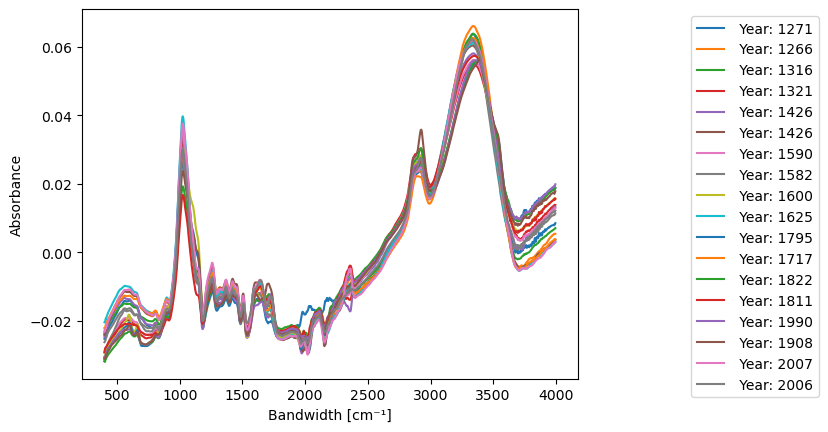

In [21]:
n = 0
for row in y.iterrows():
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}')
    n += 1

#plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth [cm⁻¹]')
plt.ylabel('Absorbance')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


Grouping two centuries together and look at the spectrum. 

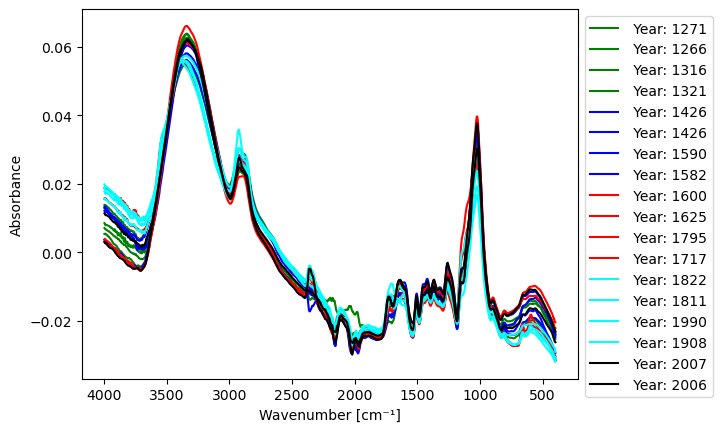

In [22]:
# Assign colors based on centuries
century_colors = {12: 'green', 13: 'green', 14: 'blue', 15: 'blue', 16: 'red', 17: 'red', 18: 'cyan', 19: 'cyan', 20: 'black'}

n = 0
for row in y.iterrows():
    century = int(str(random_samples.iloc[n,0])[:2])  # Extract century from the Year
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}', color=century_colors.get(century)) 
    n += 1


plt.gca().invert_xaxis()
#plt.title('Bandwidths vs Absorbances')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


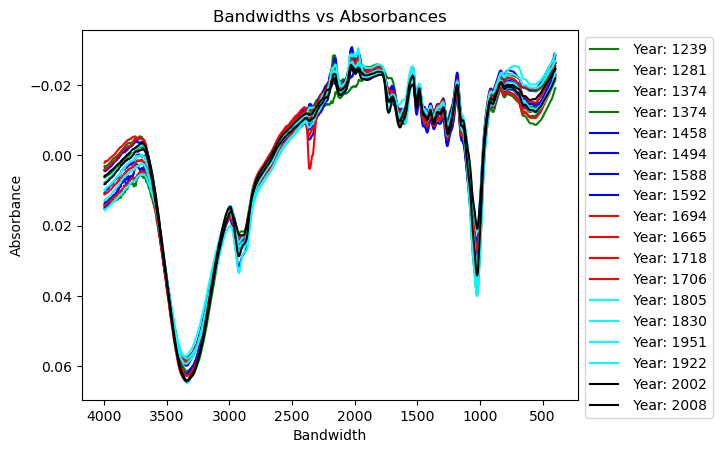

In [26]:
# Assign colors based on centuries
century_colors = {12: 'green', 13: 'green', 14: 'blue', 15: 'blue', 16: 'red', 17: 'red', 18: 'cyan', 19: 'cyan', 20: 'black'}

n = 0
for row in y.iterrows():
    century = int(str(random_samples.iloc[n,0])[:2])  # Extract century from the Year
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}', color=century_colors.get(century)) 
    n += 1
plt.gca().invert_xaxis()  
plt.gca().invert_yaxis()
plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Important wavenumbers indicating molecular decay in pine wood

In [5]:
features = dps1200.iloc[:, 1:].values
labels = dps1200.iloc[:, 0].values

In [24]:
test_labels_2d = labels.reshape(-1, 1)
test_data_all = np.concatenate((test_labels_2d, dps1200), axis=1)

sorted_indices = np.argsort(test_data_all[:, 0])
test_all_sorted = test_data_all[sorted_indices]

In [25]:
y = test_all_sorted[-1,2:]
x = dps1200.columns.values
x = x[1:]
x = x.astype(int)

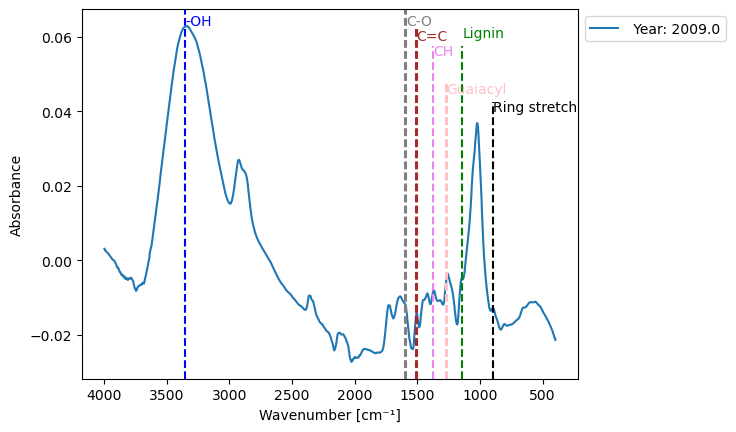

In [36]:
plt.plot(x, y, label=f' Year: {test_all_sorted[-1,0]}')

#OH
plt.axvline(3350, ymax=1, color='blue', linestyle='--')
plt.text(3350,0.063,'-OH', color='blue')

#Conjugated C-O (1594-1602)
plt.axvline(1594, color='grey', linestyle='--')
plt.text(1590,0.063,'C-O', color='grey')
plt.axvline(1602, color='grey', linestyle='--')

# C=C stretching vibration in lignin aromatic skeletal (1505-1511)
plt.axvline(1505, ymax=0.95, color='brown', linestyle='--')
plt.text(1505,0.059,'C=C', color='brown')
plt.axvline(1511, ymax=0.95, color='brown', linestyle='--')

# guaiacyl ring breathing, C–O stretch in lignin (1264–1270)
plt.axvline(1270, ymax=0.80, color='pink', linestyle='--')
plt.text(1270,0.045,'Guaiacyl', color='pink')
plt.axvline(1264, ymax=0.80, color='pink', linestyle='--')

# lignin band (1140)
plt.axvline(1140, ymax=0.9, color='green', linestyle='--')
plt.text(1140,0.06,'Lignin', color='green')

# CH bending cellulose (1375)
plt.axvline(1375, ymax=0.9, color='violet', linestyle='--')
plt.text(1375,0.055,'CH', color='violet')

# asym. Out of phase ring stretching cellulose (897)
plt.axvline(897, ymax=0.75, color='black', linestyle='--')
plt.text(897,0.04,'Ring stretch', color='black')


plt.gca().invert_xaxis()
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Heatmap of the Input Spectra

In [46]:
features = dps1200.iloc[:, 1:].values
labels = dps1200.iloc[:, 0].values

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [48]:
test_labels_2d = test_labels.reshape(-1, 1)
test_data_all = np.concatenate((test_labels_2d, test_data), axis=1)

sorted_indices = np.argsort(test_data_all[:, 0])
test_all_sorted = test_data_all[sorted_indices]

sorted_test_labels = test_all_sorted[:, 0]
sorted_test_data = test_all_sorted[:, 1:]

In [49]:
y = dps1200.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

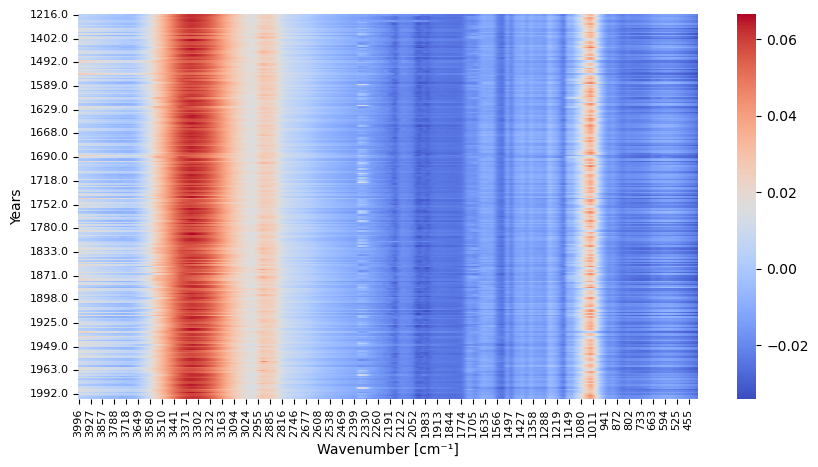

In [50]:
wavelengths = xp[::36]

years = sorted_test_labels[::16]

# Plot Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(sorted_test_data, cmap='coolwarm')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Years')
#plt.title('Input Spectra Heatmap')
plt.xticks(ticks=np.arange(0.5, sorted_test_data.shape[1] + 0.5, 36), labels=wavelengths, fontsize=8)
plt.yticks(ticks=np.arange(0.5, sorted_test_data.shape[0] + 0.5, 16), labels=years, fontsize=8)
plt.show()

# Test Set Distribution of dps1200

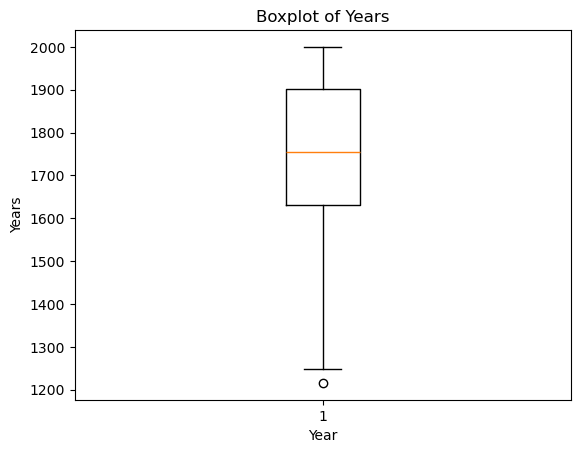

In [8]:
years = test_labels

plt.boxplot(years)
plt.xlabel('Year')
plt.ylabel('Years')
plt.title('Boxplot of Years')

# Show the plot
plt.show()

In [ ]:
# Min and Max
min_value = np.min(years)
max_value = np.max(years)

# Mean
mean_value = np.mean(years)

# Median
median_value = np.median(years)

# Standarddeviation and variance
std_deviation = np.std(years)
variance = np.var(years)

# Percentiles
percentiles = np.percentile(years, [25, 50, 75])

print(f"Min: {min_value}, Max: {max_value}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}, Variance: {variance}")
print(f"25th Percentile: {percentiles[0]}, Median: {percentiles[1]}, 75th Percentile: {percentiles[2]}")

Min: 1216, Max: 2000
Mean: 1738.6346153846155
Median: 1754.5
Standard Deviation: 187.48624860815733, Variance: 35151.09341715978
25th Percentile: 1631.25, Median: 1754.5, 75th Percentile: 1902.25


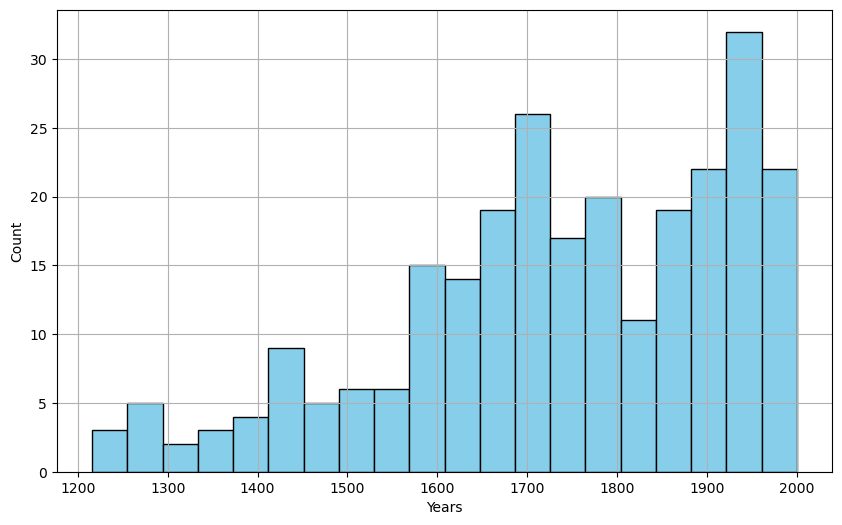

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(years, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Count')
#plt.title('Histogram of Years')
plt.grid(True)
plt.show()